In [1]:
import numpy as np 
import pandas as pd
import sys
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
ACC=pd.read_csv('1571132161_A013E1\ACC.csv')
BVP=pd.read_csv('1571132161_A013E1\BVP.csv') ##Blood Volume Pulse
EDA=pd.read_csv('1571132161_A013E1\EDA.csv')
HR=pd.read_csv('1571132161_A013E1\HR.csv')
IBI=pd.read_csv('1571132161_A013E1\IBI.csv') #inter-beat-interval

In [3]:
a=BVP.loc[::64]
b=ACC.loc[::32]
c=EDA.loc[::4]
a=a.reset_index()
b=b.reset_index()
c=c.reset_index()
DataSet=pd.DataFrame(columns=['BVP','ACC','EDA','HR','EM1','EM2'])
DataSet['BVP'] = a.iloc[:,1]
DataSet['ACC'] = b.iloc[:,1]
DataSet['EDA'] = c.iloc[:,1]
DataSet['HR']=HR
DataSet=DataSet.drop(DataSet.index[len(HR):len(DataSet)])

In [4]:
DataSet['EM1'].iloc[0:int(len(DataSet)/3)]= 0
DataSet['EM2'].iloc[0:int(len(DataSet)/3)]= -1
DataSet['EM1'].iloc[int(len(DataSet)/3):2*int(len(DataSet)/3)]= 2
DataSet['EM2'].iloc[int(len(DataSet)/3):2*int(len(DataSet)/3)]= -2
DataSet['EM1'].iloc[2*int(len(DataSet)/3):int(len(DataSet))]= 4
DataSet['EM2'].iloc[2*int(len(DataSet)/3):int(len(DataSet))]= -2

C:\Users\PCI\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
DataSet.to_csv('Dataset.csv')

In [6]:
DataSet.head()

,BVP,ACC,EDA,HR,EM1,EM2
0,64.00,32.0,4.000000,1.00,0,-1
1,85.71,38.0,0.039712,86.00,0,-1
2,148.81,44.0,0.008967,97.00,0,-1
3,11.23,23.0,0.008967,93.00,0,-1
4,47.26,17.0,0.017934,84.25,0,-1


In [7]:
from keras.models import Sequential # 케라스의 Sequential()을 임포트
from keras.layers import Dense # 케라스의 Dense()를 임포트
from keras import optimizers # 케라스의 옵티마이저를 임포트

Using TensorFlow backend.


In [8]:
df=pd.DataFrame(columns=['BVP','ACC','EDA','HR'])
df['BVP']=DataSet['BVP']
df['ACC']=DataSet['ACC']
df['EDA']=DataSet['EDA']
df['HR']=DataSet['HR']

df_em1=pd.DataFrame(columns=['EM1'])
df_em2=pd.DataFrame(columns=['EM2'])
df_em1['EM1']=DataSet['EM1']
df_em2['EM2']=DataSet['EM2']

In [9]:
X=df

In [10]:
y=df_em1 #즐거움과 화남의 정도를 측정하는 감정 EM1

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

C:\Users\PCI\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 4), (179, 4), (712, 3), (179, 3))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
sgd=optimizers.SGD(lr=0.01)
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()

W1107 16:58:01.289057   988 deprecation_wrapper.py:119] From C:\Users\PCI\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1107 16:58:01.379001   988 deprecation_wrapper.py:119] From C:\Users\PCI\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1107 16:58:01.382999   988 deprecation_wrapper.py:119] From C:\Users\PCI\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1107 16:58:01.490932   988 deprecation_wrapper.py:119] From C:\Users\PCI\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1107 16:58:01.542900   988 deprecation_wrapper.py:119] From C:\Users\PCI\Anaconda3\lib\

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [14]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [15]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

W1107 16:58:01.814732   988 deprecation.py:323] From C:\Users\PCI\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1107 16:58:01.947651   988 deprecation_wrapper.py:119] From C:\Users\PCI\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 1ms/step - loss: 1.8467 - acc: 0.3624 - val_loss: 1.3921 - val_acc: 0.4302
Epoch 2/100
712/712 [==============================] - 0s 87us/step - loss: 1.1879 - acc: 0.4635 - val_loss: 1.1784 - val_acc: 0.4972
Epoch 3/100
712/712 [==============================] - 0s 67us/step - loss: 1.0159 - acc: 0.5211 - val_loss: 1.0454 - val_acc: 0.4581
Epoch 4/100
712/712 [==============================] - 0s 101us/step - loss: 1.0046 - acc: 0.5253 - val_loss: 1.2396 - val_acc: 0.3520
Epoch 5/100
712/712 [==============================] - 0s 81us/step - loss: 1.0125 - acc: 0.5365 - val_loss: 0.9745 - val_acc: 0.5475
Epoch 6/100
712/712 [==============================] - 0s 80us/step - loss: 0.9546 - acc: 0.5660 - val_loss: 1.0859 - val_acc: 0.4413
Epoch 7/100
712/712 [==============================] - 0s 66us/step - loss: 0.9324 - acc: 0.5506 - val_loss: 1.0764 - val_acc: 0.5196
Epoch 8/100
712/

Epoch 61/100
712/712 [==============================] - 0s 108us/step - loss: 0.7989 - acc: 0.6362 - val_loss: 0.9868 - val_acc: 0.5084
Epoch 62/100
712/712 [==============================] - 0s 87us/step - loss: 0.7911 - acc: 0.6292 - val_loss: 0.9466 - val_acc: 0.5978
Epoch 63/100
712/712 [==============================] - 0s 80us/step - loss: 0.7847 - acc: 0.6362 - val_loss: 0.9623 - val_acc: 0.5419
Epoch 64/100
712/712 [==============================] - 0s 129us/step - loss: 0.7725 - acc: 0.6166 - val_loss: 0.8928 - val_acc: 0.5475
Epoch 65/100
712/712 [==============================] - 0s 91us/step - loss: 0.7638 - acc: 0.6306 - val_loss: 0.9147 - val_acc: 0.5698
Epoch 66/100
712/712 [==============================] - 0s 116us/step - loss: 0.7793 - acc: 0.6348 - val_loss: 0.9049 - val_acc: 0.5754
Epoch 67/100
712/712 [==============================] - 0s 102us/step - loss: 0.7766 - acc: 0.6306 - val_loss: 0.9580 - val_acc: 0.5698
Epoch 68/100
712/712 [=============================

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

179/179 [==============================] - 0s 56us/step
Accuracy = 0.57


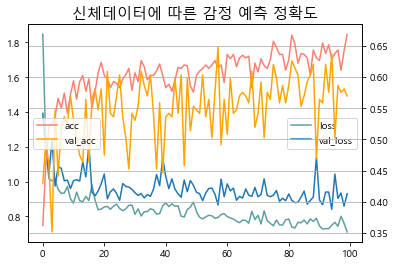

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.plot(hist.history['loss'],color='cadetblue')
ax1.plot(hist.history['val_loss'])
ax2.plot(hist.history['acc'],color='salmon')
ax2.plot(hist.history['val_acc'],color='orange')
ax1.legend(['loss','val_loss'],loc='center right')
ax2.legend(['acc','val_acc'],loc='center left')
plt.title("신체데이터에 따른 감정 예측 정확도", fontsize = 15)
plt.grid()
plt.show()

In [18]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.64      0.51      0.57        59
           1       0.41      0.71      0.52        49
           2       0.79      0.52      0.63        71

   micro avg       0.57      0.57      0.57       179
   macro avg       0.61      0.58      0.57       179
weighted avg       0.64      0.57      0.58       179

[[30 25  4]
 [ 8 35  6]
 [ 9 25 37]]


In [19]:
test_set = np.array([[192,17.0,0.151161,70.33]])
print("예측 감정 수준 EM1(즐거움 및 화남의 정도): {}".format(
    DataSet['EM1'].unique()[model.predict_classes(test_set)]))

예측 감정 수준 EM1(즐거움 및 화남의 정도): [0]


In [20]:
y=df_em2 #흥분되거나 평온함의 정도 EM2

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

C:\Users\PCI\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 4), (179, 4), (712, 2), (179, 2))

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
sgd=optimizers.SGD(lr=0.01)
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [25]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 1ms/step - loss: 3.3688 - acc: 0.6025 - val_loss: 1.6330 - val_acc: 0.6872
Epoch 2/100
712/712 [==============================] - 0s 129us/step - loss: 0.9364 - acc: 0.6124 - val_loss: 0.8673 - val_acc: 0.6145
Epoch 3/100
712/712 [==============================] - 0s 101us/step - loss: 0.6741 - acc: 0.7065 - val_loss: 0.7221 - val_acc: 0.7151
Epoch 4/100
712/712 [==============================] - 0s 111us/step - loss: 0.6696 - acc: 0.6938 - val_loss: 0.6848 - val_acc: 0.6983
Epoch 5/100
712/712 [==============================] - 0s 79us/step - loss: 0.6091 - acc: 0.7135 - val_loss: 0.6217 - val_acc: 0.7542
Epoch 6/100
712/712 [==============================] - 0s 83us/step - loss: 0.6290 - acc: 0.6910 - val_loss: 0.9570 - val_acc: 0.6816
Epoch 7/100
712/712 [==============================] - 0s 112us/step - loss: 0.6942 - acc: 0.7022 - val_loss: 0.6372 - val_acc: 0.6592
Epoch 8/100
7

712/712 [==============================] - 0s 80us/step - loss: 0.5312 - acc: 0.7500 - val_loss: 0.5494 - val_acc: 0.6816
Epoch 62/100
712/712 [==============================] - 0s 80us/step - loss: 0.5284 - acc: 0.7612 - val_loss: 0.5697 - val_acc: 0.7654
Epoch 63/100
712/712 [==============================] - 0s 76us/step - loss: 0.4708 - acc: 0.7851 - val_loss: 0.5754 - val_acc: 0.7430
Epoch 64/100
712/712 [==============================] - 0s 76us/step - loss: 0.5623 - acc: 0.7191 - val_loss: 0.5677 - val_acc: 0.7486
Epoch 65/100
712/712 [==============================] - 0s 70us/step - loss: 0.4876 - acc: 0.7795 - val_loss: 0.5579 - val_acc: 0.7430
Epoch 66/100
712/712 [==============================] - 0s 72us/step - loss: 0.4921 - acc: 0.7640 - val_loss: 0.5198 - val_acc: 0.7430
Epoch 67/100
712/712 [==============================] - 0s 67us/step - loss: 0.5481 - acc: 0.7416 - val_loss: 0.7975 - val_acc: 0.7430
Epoch 68/100
712/712 [==============================] - 0s 88us/step

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

179/179 [==============================] - 0s 151us/step
Accuracy = 0.75


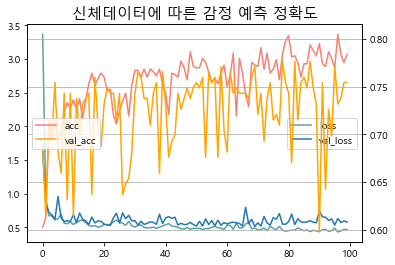

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.plot(hist.history['loss'],color='cadetblue')
ax1.plot(hist.history['val_loss'])
ax2.plot(hist.history['acc'],color='salmon')
ax2.plot(hist.history['val_acc'],color='orange')
ax1.legend(['loss','val_loss'],loc='center right')
ax2.legend(['acc','val_acc'],loc='center left')
plt.title("신체데이터에 따른 감정 예측 정확도", fontsize = 15)
plt.grid()
plt.show()

In [28]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       120
           1       0.73      0.41      0.52        59

   micro avg       0.75      0.75      0.75       179
   macro avg       0.74      0.67      0.68       179
weighted avg       0.75      0.75      0.73       179

[[111   9]
 [ 35  24]]


In [29]:
test_set = np.array([[192,17.0,0.151161,70.33]])
print("예측 감정 수준 EM2(평온함과 흥분됨의 정도): {}".format(
    DataSet['EM2'].unique()[model.predict_classes(test_set)]))

예측 감정 수준 EM2(평온함과 흥분됨의 정도): [-2]
